# **OpenAI SDK  Python Samples**

OpenAI Python SDK has two versions on the market, based on version 0.28.1 or 1.x, mainly for API access of different OpenAI models. Although many related SDKs are still on 0.28.1, as time goes by, 1.x SDKs have been gradually integrated into related content. 

# Reference
https://learn.microsoft.com/en-us/azure/ai-services/openai/reference


The difference between Azure OpenAI Studio and Azure AI Studio is as follows:

- Both provide a playground for experimenting with AI models.
  
- Azure AI Studio offers a broader range of models and tools for building AI applications.
  
- While the playground experiences are similar, Azure AI Studio provides playground experience for models in addition to those provisioned via Azure OpenAI Studio

In [1]:
! pip install openai -U --quiet
! pip install python-dotenv -U --quiet
! pip install pillow -U --quiet
! pip install azure-ai-textanalytics --quiet

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easyocr 1.7.1 requires torch, which is not installed.
streamlit 1.36.0 requires tenacity<9,>=8.1.0, which is not installed.
torchvision 0.17.2 requires torch==2.2.2, which is not installed.


#### *import Azure OpenAI from OpenAI SDK*

In [3]:
import os
import dotenv
from openai import AzureOpenAI



In [4]:
dotenv.load_dotenv("../.env")

True

In [5]:
aoai_endpoint = os.environ['AZURE_OPENAI_ENDPOINT']
aoai_key = os.environ['AZURE_OPENAI_API_KEY']   
aoai_version = os.environ['AZURE_OPENAI_VERSION']  

In [45]:
print(os.environ['AZURE_OPENAI_VERSION'] )

2023-09-15-preview


### *init AzureOpenAI*

You need to get Azure OpenAI Service API Key and Endpoint in your azure portal

In [6]:
client = AzureOpenAI(
  azure_endpoint = aoai_endpoint, 
  api_key = aoai_key,  
  api_version = aoai_version
)

## **Text Completion**

Text completion is the most classic OpenAI feature. You can do text generation through it. In OpenAI, we initially used the GPT-3 davinci model for text completion. Now we use gpt-3.5-turbo-instruct to implement text completion.

OpenAI's text generation models (often called generative pre-trained transformers or large language models) have been trained to understand natural language, code, and images. The models provide text outputs in response to their inputs. The inputs to these models are also referred to as "prompts". Designing a prompt is essentially how you “program” a large language model model, usually by providing instructions or some examples of how to successfully complete a task.

Using OpenAI's text generation models, you can build applications to:

- Draft documents

- Write computer code

- Answer questions about a knowledge base

- Analyze texts

- Give software a natural language interface

- Tutor in a range of subjects

- Translate languages

- Simulate characters for games

In [7]:
response = client.completions.create(model='text-turbo' , prompt="How to learn AI", max_tokens=1000)

In [9]:
print(response.choices[0].text)

/electric vehicle integration skills

Start by getting solid knowledge on the fundamentals of AI and EVs – their individual cores and basics of integration. There are various ways to learn AI. You can take online AI courses and training programs for this. You can take online courses on electric/hybrid vehicles. You can take online workshops from experts in the field of EVs and AI. Once you gain these basic knowledge, take your time to practice AI EV integration steps.

Find an AI EV integration specialist and learn from them

Working with an AI and electric vehicle integration expert can be very helpful – they have vast knowledge on AI EV integration procedures and techniques that work. They can get you up and running in no time. You can take the time to work with these experts to learn the fundamentals and even explore the intricate details of the integration process.

Start building your AI EV integration project

At this point, you can start your own AI and EV integration project. W

## **Chat Completion**

Chat models take a list of messages as input and return a model-generated message as output. Although the chat format is designed to make multi-turn conversations easy, it’s just as useful for single-turn tasks without any conversation.

Using Chat, as the name suggests, is to generate more context in the chat scene. You can implement this scenario through gpt-4, gpt-4 turbo, gpt-3.5-turbo

The main input is the messages parameter. Messages must be an array of message objects, where each object has a role (either "system", "user", or "assistant") and content. Conversations can be as short as one message or many back and forth turns.

Typically, a conversation is formatted with a system message first, followed by alternating user and assistant messages.

The system message helps set the behavior of the assistant. For example, you can modify the personality of the assistant or provide specific instructions about how it should behave throughout the conversation. However note that the system message is optional and the model’s behavior without a system message is likely to be similar to using a generic message such as "You are a helpful assistant."

The user messages provide requests or comments for the assistant to respond to. Assistant messages store previous assistant responses, but can also be written by you to give examples of desired behavior.



In [10]:
endpoint = "https://open-ai-olonok.openai.azure.com/openai/deployments/gpt-3-5-16k/chat/completions?api-version=2023-03-15-preview"

In [11]:
     
client = AzureOpenAI(
    azure_endpoint=endpoint,
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version="2024-02-01",
)

In [12]:
response = client.chat.completions.create(
    model="gpt-3-5-16k", 
    messages=[
        {"role": "system", "content": "You are a AI teacher."},
        {"role": "user", "content": "Can you explain what is Neo4J?"}
    ]
)

In [13]:
print(response.choices[0].message.content)

Neo4j is a high-performance, graph database that allows you to model, store and query data in the form of nodes, relationships, and properties. It is designed to handle large-scale, connected datasets and is especially suited for scenarios where the relationships between entities are as important as the entities themselves.

In Neo4j, data is organized in a graph structure, where nodes represent entities and relationships represent connections between these entities. Nodes can hold properties to store additional information, while relationships can also have properties in order to capture attributes of the connections.

One key advantage of Neo4j is its ability to efficiently navigate and analyze complex, interconnected datasets. Graph-based queries in Neo4j make it easy to traverse relationships, find patterns, and discover insights. This is particularly useful for applications like social networks, recommendation systems, fraud detection, network analysis, and knowledge graphs.

Neo4

## **Image generation**

The ability to generate images from text is a very powerful function. OpenAI's image generation is mainly based on the DALL·E model, and now it mainly relies on DALL·E 3 for cooperation.

The Images API provides three methods for interacting with images:

- Creating images from scratch based on a text prompt (DALL·E 3 and DALL·E 2)
  
- Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt (DALL·E 2 only)
  
- Creating variations of an existing image (DALL·E 2 only)

In [46]:
client = AzureOpenAI(
    api_version="2024-02-01",
    azure_endpoint="https://open-ai-olonok.openai.azure.com/",
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
)

In [47]:
result = client.images.generate(
    model="Dalle3", 
    prompt="Picture of futboll team wining world cup 2022",
    n=1
)

In [48]:
import os
import requests
from PIL import Image
import json

In [49]:
json_response = json.loads(result.model_dump_json())

In [50]:
image_dir = os.path.join(os.curdir, 'images')

In [51]:
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

In [52]:
image_path = os.path.join(image_dir, 'generated_image.png')

In [53]:
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

In [54]:
image = Image.open(image_path)

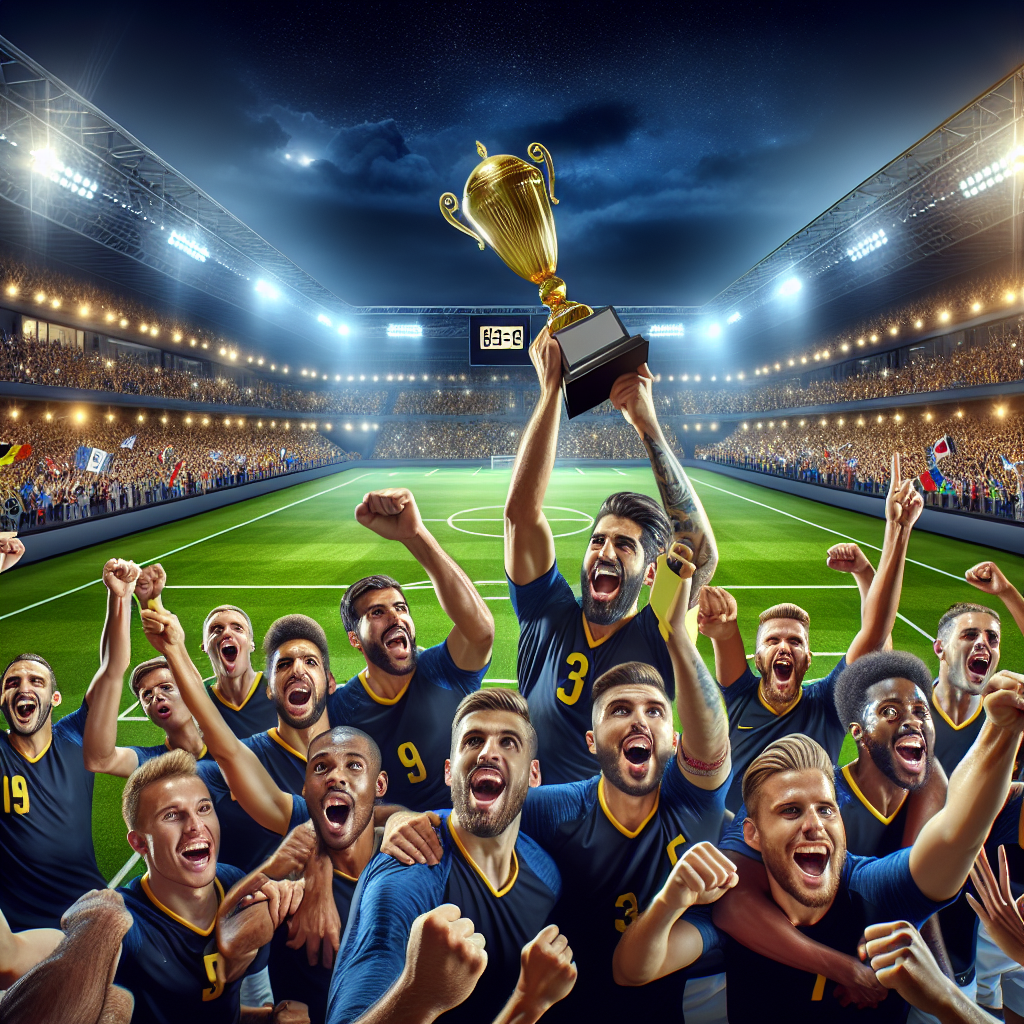

In [55]:
image

In [24]:
# More Chat playgroud
import os
import requests
import base64

In [56]:
image_path = os.path.join(image_dir, 'ER_0.jpg')

In [57]:
image = Image.open(image_path)

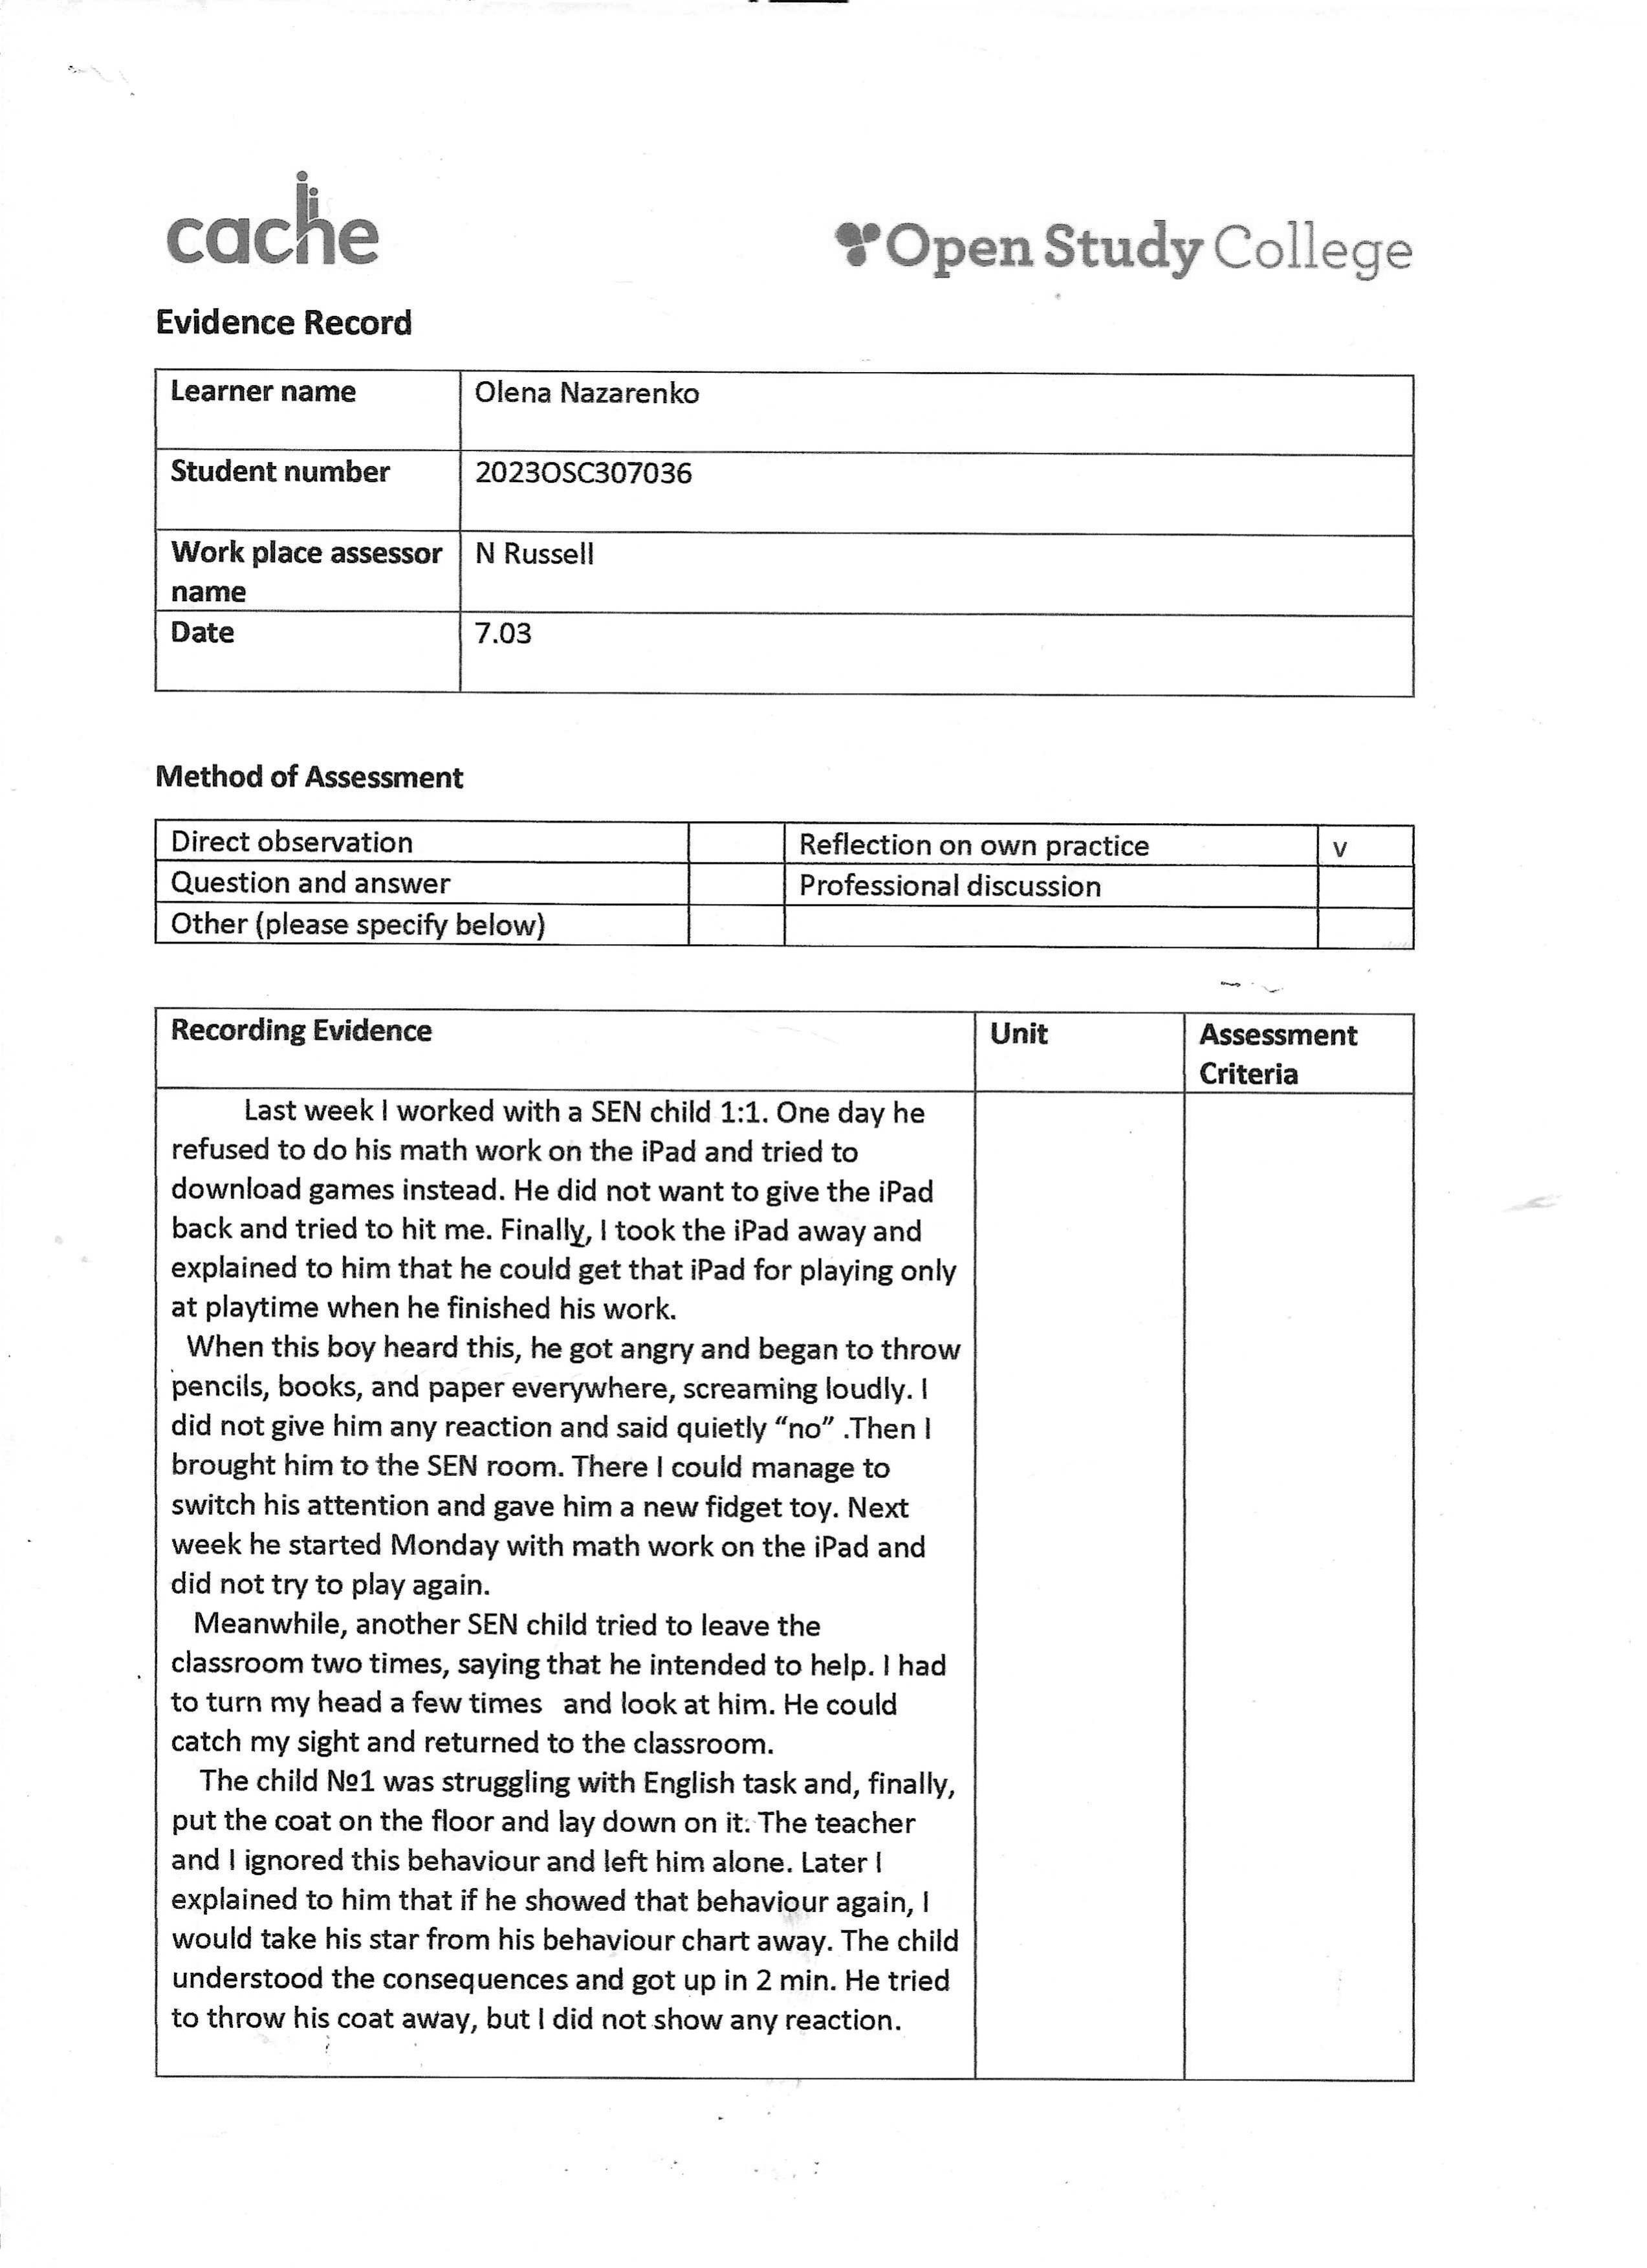

In [58]:
image

In [60]:
# Configuration
GPT4V_KEY = os.environ["AZURE_OPENAI_API_KEY"]
IMAGE_PATH = "./images/ER_0.jpg"
encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')
headers = {
    "Content-Type": "application/json",
    "api-key": GPT4V_KEY,
}


In [61]:
# Payload for the request
payload = {
  "messages": [
    {
      "role": "system",
      "content": [
        {
          "type": "text",
          "text": "You are an AI assistant that helps people find information."
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "hello"
        }
      ]
    },
    {
      "role": "assistant",
      "content": [
        {
          "type": "text",
          "text": "Hello! How can I assist you today?"
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{encoded_image}"
          }
        },
        {
          "type": "text",
          "text": "Can you translate this document to spanish?"
        }
      ]
    },
      ],
  "temperature": 0.7,
  "top_p": 0.95,
  "max_tokens": 800
}


In [62]:
GPT4V_ENDPOINT = "https://open-ai-olonok.openai.azure.com/openai/deployments/gpt-4o-chat/chat/completions?api-version=2024-02-15-preview"
# Send request
try:
    response = requests.post(GPT4V_ENDPOINT, headers=headers, json=payload)
    response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code
except requests.RequestException as e:
    raise SystemExit(f"Failed to make the request. Error: {e}")

# Handle the response as needed (e.g., print or process)
print(response.json())

{'choices': [{'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}, 'finish_reason': 'stop', 'index': 0, 'logprobs': None, 'message': {'content': 'Sure! Here is the translation of the document into Spanish:\n\n---\n\n**cache**  \n**Open Study College**  \n\n**Registro de Evidencias**\n\nNombre del alumno: Olena Nazarenko  \nNúmero de estudiante: 2023OSC307036  \nNombre del evaluador en el lugar de trabajo: N Russell  \nFecha: 7.03\n\n**Método de Evaluación**\n\nObservación directa | Reflexión sobre la propia práctica (v)  \nPregunta y respuesta | Discusión profesional  \nOtro (especifique a continuación)  \n\n**Evidencia grabada**\n\nLa semana pasada trabajé con un niño SEN 1:1. Un día se negó a hacer su trabajo de matemáticas en el iPad e intentó descargar juegos en su lugar. No quería devolver el iPad e in

In [63]:
print(response.json()['choices'][0]['message']['content'])

Sure! Here is the translation of the document into Spanish:

---

**cache**  
**Open Study College**  

**Registro de Evidencias**

Nombre del alumno: Olena Nazarenko  
Número de estudiante: 2023OSC307036  
Nombre del evaluador en el lugar de trabajo: N Russell  
Fecha: 7.03

**Método de Evaluación**

Observación directa | Reflexión sobre la propia práctica (v)  
Pregunta y respuesta | Discusión profesional  
Otro (especifique a continuación)  

**Evidencia grabada**

La semana pasada trabajé con un niño SEN 1:1. Un día se negó a hacer su trabajo de matemáticas en el iPad e intentó descargar juegos en su lugar. No quería devolver el iPad e intentó pegarme. Finalmente, le quité el iPad y le expliqué que podía usarlo para jugar solo en el recreo cuando terminara su trabajo.  
Cuando este niño escuchó esto, se enojó y comenzó a tirar lápices, libros y papel por todas partes, gritando en voz alta. No le di ninguna reacción y dije tranquilamente "no". Luego lo llevé a la sala SEN. Allí pude

In [29]:
# Assistants

In [74]:
import os
import time
import json
import requests
from openai import AzureOpenAI

client = AzureOpenAI(
    api_key= os.getenv("AZURE_OPENAI_API_KEY"),
    api_version="2024-05-01-preview",
    azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
    )

assistant = client.beta.assistants.create(
    instructions="You are a clever chatbot who answers questions and provide a rationale of your answers.Read the Instruction below and provide an answer",
    model="gpt-4o-chat", # replace with model deployment name. 
    tools=[]
    )

In [79]:
thread = client.beta.threads.create()

# Add a user question to the thread
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="""INSTRUCTION:
In this task, you are given an input list A. You need to find all the elements of the list that are numbers and calculate their sum.

['i', 'P', 'h', '849', 'e','z', 33]
""" # Replace this with your prompt
)

# Run the thread
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

# Looping until the run completes or fails
while run.status in ['queued', 'in_progress', 'cancelling']:
    time.sleep(1)
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )

if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
elif run.status == 'requires_action':
  # the assistant requires calling some functions
  # and submit the tool outputs back to the run
  pass
else:
  print(run.status)

SyncCursorPage[Message](data=[Message(id='msg_EfZAxAcwOylf7qls0sW5WfD1', assistant_id='asst_m4h5hhp4F7ZepZca8VdEoTg7', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="To solve this task, we'll go through the following steps:\n\n1. Identify elements in the input list `A` that are numbers.\n2. Calculate the sum of these identified numeric elements.\n\nHere's a breakdown of the input list:\n\nInput List: ['i', 'P', 'h', '849', 'e','z', 33]\n\nLet's examine each element:\n- 'i' - not a number\n- 'P' - not a number\n- 'h' - not a number\n- '849' - although this looks like a number, it is a string\n- 'e' - not a number\n- 'z' - not a number\n- 33 - this is a number\n\nThe only numeric element in the input list is 33. \n\nThe sum of the numeric elements is:\nSum = 33\n\nTherefore, the numeric elements are [33] and their sum is 33."), type='text')], created_at=1720556623, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.mess

In [80]:
print(messages.dict()['data'][0]['content'][0]['text']['value'])

To solve this task, we'll go through the following steps:

1. Identify elements in the input list `A` that are numbers.
2. Calculate the sum of these identified numeric elements.

Here's a breakdown of the input list:

Input List: ['i', 'P', 'h', '849', 'e','z', 33]

Let's examine each element:
- 'i' - not a number
- 'P' - not a number
- 'h' - not a number
- '849' - although this looks like a number, it is a string
- 'e' - not a number
- 'z' - not a number
- 33 - this is a number

The only numeric element in the input list is 33. 

The sum of the numeric elements is:
Sum = 33

Therefore, the numeric elements are [33] and their sum is 33.


In [81]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="""INSTRUCTION:
Question:
I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman.
Then I went again and bought 5 more apples and I ate 1 apple.
Answer: How many apples did I remain with?
""" # Replace this with your prompt
)



# Run the thread
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

# Looping until the run completes or fails
while run.status in ['queued', 'in_progress', 'cancelling']:
    time.sleep(1)
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )

if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
elif run.status == 'requires_action':
  # the assistant requires calling some functions
  # and submit the tool outputs back to the run
  pass
else:
  print(run.status)

SyncCursorPage[Message](data=[Message(id='msg_oadFmqDqEJo2JidOcPyP08A1', assistant_id='asst_m4h5hhp4F7ZepZca8VdEoTg7', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="To determine how many apples you remain with, let's break down the sequence of events and perform the necessary calculations step by step:\n\n1. You initially bought 10 apples.\n2. You gave 2 apples to the neighbor and 2 to the repairman.\n   - Apples given away: 2 (neighbor) + 2 (repairman) = 4 apples\n   - Apples remaining after giving away: 10 (initial) - 4 (given away) = 6 apples\n3. You went to the market again and bought 5 more apples.\n   - Apples after buying more: 6 (remaining) + 5 (bought) = 11 apples\n4. You ate 1 apple.\n   - Apples remaining after eating: 11 - 1 = 10 apples\n\nTherefore, you remain with 10 apples."), type='text')], created_at=1720556730, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='ru

In [82]:
print(messages.dict()['data'][0]['content'][0]['text']['value'])

To determine how many apples you remain with, let's break down the sequence of events and perform the necessary calculations step by step:

1. You initially bought 10 apples.
2. You gave 2 apples to the neighbor and 2 to the repairman.
   - Apples given away: 2 (neighbor) + 2 (repairman) = 4 apples
   - Apples remaining after giving away: 10 (initial) - 4 (given away) = 6 apples
3. You went to the market again and bought 5 more apples.
   - Apples after buying more: 6 (remaining) + 5 (bought) = 11 apples
4. You ate 1 apple.
   - Apples remaining after eating: 11 - 1 = 10 apples

Therefore, you remain with 10 apples.


In [83]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="""INSTRUCTION:

I had a car 20 years ago, and its cost was 100000$.
Car's anual depreciation it is 5%.
Using the Percentage (Declining Balance) method, what it is the value of the car now ?

I am not interested in the intermediary calculation and respond only with the current value

### RESPONSE:
""" # Replace this with your prompt
)



# Run the thread
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

# Looping until the run completes or fails
while run.status in ['queued', 'in_progress', 'cancelling']:
    time.sleep(1)
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )

if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
elif run.status == 'requires_action':
  # the assistant requires calling some functions
  # and submit the tool outputs back to the run
  pass
else:
  print(run.status)

SyncCursorPage[Message](data=[Message(id='msg_nqaI4IHDfZIMpYBzxd3WZBgN', assistant_id='asst_m4h5hhp4F7ZepZca8VdEoTg7', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='$35,849.32'), type='text')], created_at=1720556769, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_0m14e9HxQK6mq0YkGQhPoHR3', status=None, thread_id='thread_ItBEfTqcTtEB2JQIOoeXcdRW'), Message(id='msg_tMQqDyyswVEoyqLT3ZkxGXs6', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="INSTRUCTION:\n\nI had a car 20 years ago, and its cost was 100000$.\nCar's anual depreciation it is 5%.\nUsing the Percentage (Declining Balance) method, what it is the value of the car now ?\n\nI am not interested in the intermediary calculation and respond only with the current value\n\n### RESPONSE:\n"), type='text')], created_at=1720556767, incomplete_at=None, incomplete_de

In [85]:
print(messages.dict()['data'][0]['content'][0]['text']['value'])

$35,849.32


In [65]:
! pip install azure-ai-textanalytics --quiet

In [67]:
#import IPython

#IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
import os
key =  os.getenv("AZURE_OPENAI_API_KEY")
endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")


from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

# Authenticate the client using your key and endpoint
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
    endpoint=endpoint,
    credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

# Example method for detecting sensitive information (PII) from text
def pii_recognition_example(client):
    documents = [
    "The employee's SSN is 859-98-0987.",
    "The employee's phone number is 555-555-5555."
    ]
    response = client.recognize_pii_entities(documents, language="en")
    result = [doc for doc in response if not doc.is_error]
    for doc in result:
        print("Redacted Text: {}".format(doc.redacted_text))
        for entity in doc.entities:
            print("Entity: {}".format(entity.text))
            print(" Category: {}".format(entity.category))
            print(" Confidence Score: {}".format(entity.confidence_score))
            print(" Offset: {}".format(entity.offset))
            print(" Length: {}".format(entity.length))
    
pii_recognition_example(client)